# Exploratory Data Analysis on Clothing Size Data

In [ ]:
# Importing the libraries required for Exploratory Data Analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# Loading the data into a dataframe
df = pd.read_csv("https://raw.githubusercontent.com/dnimm/Clothes-size-prediction-EDA/main/clothe_size_prediction.csv")
# Returns the first five observations from the dataset
df.head()

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M


In [ ]:
# Returns the last five observations from the dataset
df.tail()

,weight,age,height,size
119729,63,42.0,175.26,M
119730,45,29.0,154.94,S
119731,61,31.0,172.72,M
119732,74,31.0,167.64,XL
119733,70,30.0,167.64,XL


In [ ]:
# Gets the total number of rows and columns from the dataset
df.shape


(119734, 4)

In [ ]:
# Checks the types of data that the dataset contains
df.dtypes

weight      int64
age       float64
height    float64
size       object
dtype: object

In [ ]:
# Printing the number of duplicate rows in the dataset
duplicaterows = df[df.duplicated()]
print("Number of Duplicate Rows: ", duplicaterows.shape)

Number of Duplicate Rows:  (92330, 4)


In [ ]:
# Used to count the number of rows
df.count()

weight    119734
age       119477
height    119404
size      119734
dtype: int64

In [ ]:
# Dropping all the duplicate rows in the dataset
df = df.drop_duplicates()
df.head()

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M


In [ ]:
# Returns the number of missing values in each column
print(df.isnull().sum())

weight      0
age       184
height    254
size        0
dtype: int64


In [ ]:
# Dropping the missing values
df = df.dropna()
df.count()

weight    26971
age       26971
height    26971
size      26971
dtype: int64

In [ ]:
# After dropping the values
print(df.isnull().sum())

weight    0
age       0
height    0
size      0
dtype: int64


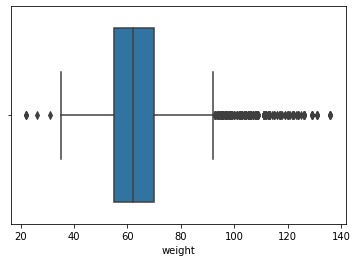

In [ ]:
# Displays boxplot of weight data to find outliers
sns.boxplot(x = df['weight'])

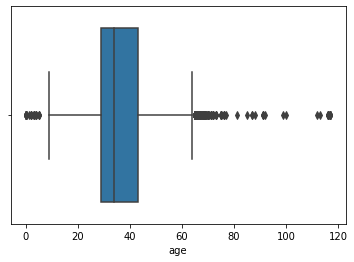

In [ ]:
# Displays boxplot of age data to find outliers
sns.boxplot(x = df['age'])

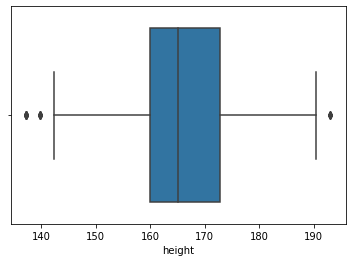

In [ ]:
# Displays boxplot of height data to find outliers
sns.boxplot(x = df['height'])

In [ ]:
# Calculates the Interquartile range(IQR) which can be used detect outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

weight    15.0
age       14.0
height    12.7
dtype: float64


In [ ]:
# Removes data which is not in the range
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(25750, 4)


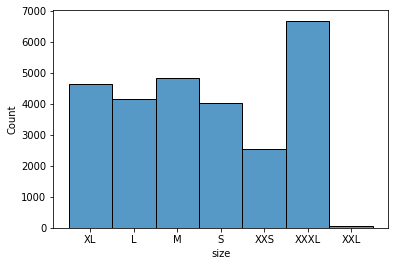

In [ ]:
# Displays the count of each size 
sns.histplot(x = df['size'])

In [ ]:
# Copies the data into another variable
copydf = df.copy(deep = True)
# Changes the size data to numeric data
copydf['size'] = pd.factorize(copydf['size'])[0]
copydf


,weight,age,height,size
0,62,28.0,172.72,0
1,59,36.0,167.64,1
2,61,34.0,165.10,2
3,65,27.0,175.26,1
4,62,45.0,172.72,2
...,...,...,...,...
119683,59,54.0,157.48,1
119708,79,32.0,160.02,1
119715,65,28.0,172.72,4
119720,58,35.0,167.64,5


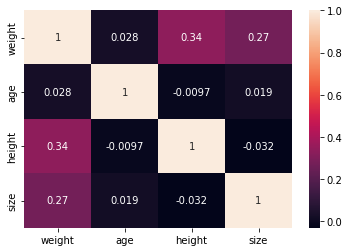

In [ ]:
# Creates a heatmap which shows the correlation between variables
sns.heatmap(copydf.corr(), annot = True)

As shown in the above heatmap, weight and height have a higher correlation with each other and size and weight have a higher correlation with each other.

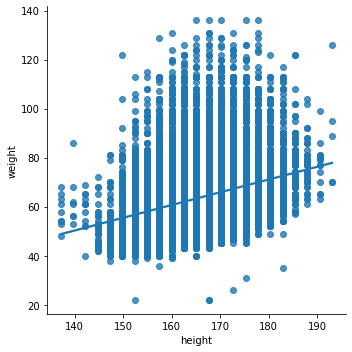

In [ ]:
# scatterplot of weight vs height
# This plot shows that there is a positive correlation between weight and height
sns.lmplot(x = 'height', y = 'weight' , data = df)

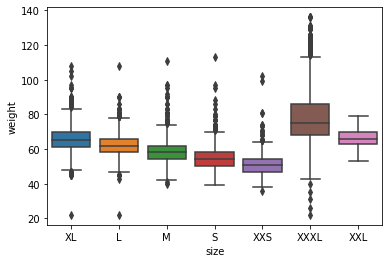

In [ ]:
# boxplot of weight vs size
# This plot shows there is a positive correlation between size and weight
sns.boxplot(df['size'], df['weight'])